# 统计方法与机器学习-实验报告5

温兆和 10205501432
## 实验内容

通过实现一个模拟实验来探究过拟合与欠拟合对预测结果带来的影响

## 数据描述

$$\sigma^2=0.2^2$$
$$\sigma_{\epsilon}^2=3^2$$
$$M=5000$$
$$p=20$$
$$p_1=10$$

## 实验过程

1.构造一个特征值矩阵$\mathbf{X}=(x_{ij})_{n\times(p+1)}$，即
$$
\mathbf{X} = \begin{pmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p}\\
1 & x_{21} & x_{22} & \ldots & x_{2p}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_{n1} & x_{n2} & \ldots & x_{np}\\
\end{pmatrix}=\begin{pmatrix}
1 & \mathbf{X_{1}^T}\\
1 & \mathbf{X_{2}^T}\\
\vdots & \vdots\\
1 & \mathbf{X_{n}^T}\\
\end{pmatrix}
$$
其中$\mathbf{X_{1}^T},\mathbf{X_{2}^T},\ldots,\mathbf{X_{n}^T}$是独立同分布的$p$维随机向量，且服从多元正态分布。具体来说，
$$\mathbf{X_{i}}\sim N_p(\mathbf{0_p},\sigma^2\mathbf{I_p})$$
这里$\mathbf{I_p}$是单位阵。

2.构造响应变量$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$$其中$$\beta = (\mathbf{1_{1+p_1}^T},\mathbf{0_{p-p_1}^T})^T$$
特别说明一下，这样构造的$\beta$使得$\mathbf{X}$中的前$(p_1+1)$列的特征（包括常数项）对因变量有影响。同时，误差向量$$\mathbf{\epsilon} = (\epsilon_1,\epsilon_2,\ldots,\epsilon_n)^T$$其中$$\epsilon_i \overset{i.i.d}\sim N(0,\sigma_{\epsilon}^2),i=1,2,\ldots,n$$
3.给定$\mathbf{x_0}=(1,\mathbf{0.05_{20}^T})^T$，$y_0=\mathbf{x_0}^T\beta+\epsilon_0$的最佳点预测值为$\mathbf{x_0}^T\beta$。这里是真实的参数$\beta$。

4.给定训练数据$\mathbf{y}$和$\mathbf{X}$，建立第$k$个模型，即$$y=\beta_{0}+\beta_{1}x_{1}+...+\beta_{k}x_{k}+\epsilon$$
于是，我们可以得到其相应的最小二乘估计
$$\hat{\beta^{(k)}}=(\hat{\beta_0},\hat{\beta_1},\ldots,\hat{\beta_k},\mathbf{0_{20-k}^T})^T$$由此，$y_0$的预测值为$$\hat{y_0^{(k)}}=\mathbf{x_0^T}\hat{\beta^{(k)}}$$这里是所得到的估计值$\hat{\beta^{(k)}}$。

5.重复1-4步$M$次，可以得到$M$个不同的观测值，分别记为$\hat{y_{0,m}^{(k)}},k=1,2,\ldots,p;m=1,2,\ldots,M$。于是，可以计算其偏差平方、方差和均方误差，即
$$Bias_k^2=(M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$
$$Var_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}})^2$$
$$MSE_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$

In [3]:
#引进本次实验所需要的Python包
import random
import numpy as np
import pandas as pd
#设置固定变量
sigma = 0.2
se_ep = 3
M=5000
p=20
p1 = 10
n = 25#样本量
#在固定k的情况下重复步骤1-4
def simulation(k):
    Observation = []
    Answer = []
    for counter in range(M):
        X = np.empty((n,p+1),dtype = float)
        Xk = np.empty((n,k+1),dtype = float)
        for i in range(0,n):
            X[i][0]=1
            Xk[i][0]=1
        for i in range(0,n):
            for j in range(1,p+1):
                X[i][j]=random.gauss(0,sigma)
                if j<=k:
                    Xk[i][j]=X[i][j]
        beta = []
        for i in range(0,p1+1):
            beta.append(1)
        for i in range(0,p-p1):
            beta.append(0)
        epsilon = []
        for i in range(0,n):
            epsilon.append(random.gauss(0,se_ep))
        x_0 =np.array( [1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05])
        y=X@beta+epsilon
        beta_hat_k = np.linalg.inv(Xk.T @ Xk) @ (Xk.T @ y)
        beta_hat_k = beta_hat_k.tolist()
        for i in range(0,p-k):
            beta_hat_k.append(0)
        beta_hat_k = np.array(beta_hat_k)
        y_0 = x_0.T@beta_hat_k
        Observation.append(y_0)
    Bias = (np.sum(Observation)/M-x_0.T@beta)**2
    Var = np.var(Observation)
    MSE = 0
    for i in range(0,len(Observation)):
        MSE = MSE +(Observation[i]-x_0.T@beta)**2
    MSE = MSE/M
    Answer.append(k)
    Answer.append(Bias)
    Answer.append(Var)
    Answer.append(MSE)
    return Answer
#获取不同k值（即不同拟合程度下）预测值的偏差平方、方差和均方误差    
Data = pd.DataFrame(columns = ['k_value','Bias','Var','MS_E'])
for i in range(1,p+1):
    Answer = simulation(i)
    Data.loc[len(Data.index)]=Answer
print(Data)

    k_value      Bias       Var      MS_E
0       1.0  0.202188  0.427207  0.629394
1       2.0  0.166763  0.456123  0.622886
2       3.0  0.118570  0.523290  0.641860
3       4.0  0.085265  0.573224  0.658489
4       5.0  0.064246  0.641796  0.706042
5       6.0  0.040126  0.710128  0.750254
6       7.0  0.021107  0.782044  0.803151
7       8.0  0.008077  0.845669  0.853747
8       9.0  0.002705  0.928581  0.931286
9      10.0  0.000067  1.084671  1.084738
10     11.0  0.000274  1.214773  1.215047
11     12.0  0.000145  1.379223  1.379368
12     13.0  0.000588  1.588151  1.588739
13     14.0  0.000306  1.876588  1.876894
14     15.0  0.000057  2.004588  2.004645
15     16.0  0.000323  2.516866  2.517189
16     17.0  0.000129  2.970183  2.970312
17     18.0  0.001331  3.713619  3.714950
18     19.0  0.000012  4.663364  4.663376
19     20.0  0.001242  6.766530  6.767772


## 实验结论

- 绘制一张图片（以k作为横坐标），偏差平方、方差以及均方误差这三条曲线。

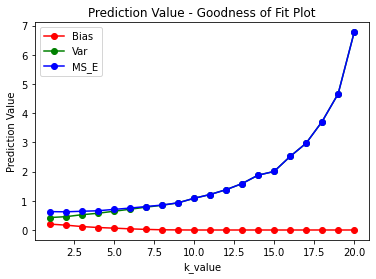

In [4]:
import matplotlib.pyplot as plt
plt.plot(Data["k_value"],Data["Bias"], color = 'red', marker = 'o', label = 'Bias')
plt.plot(Data["k_value"],Data["Var"], color = 'green', marker = 'o', label = 'Var')
plt.plot(Data["k_value"],Data["MS_E"], color = 'blue', marker = 'o', label = 'MS_E')
plt.title("Prediction Value - Goodness of Fit Plot")
plt.xlabel("k_value")
plt.ylabel("Prediction Value")
plt.legend(['Bias', 'Var', 'MS_E'])

- 基于所绘制的图象，请评述，模型的欠拟合和过拟合分别对预测结果造成怎样的影响？

在本实验中，$k=10$的情况才是既不过拟合也不欠拟合的情况。当$k<10$，欠拟合发生。从上图我们发现，此时实际预测值和真实值之间的偏差平方和$Bias$大于正常拟合时。此外，由于
$$Var_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}})^2$$
$$MSE_k = M^{-1}\sum_{m=1}^M(\hat{y_{0,m}^{(k)}}-\mathbf{x_0^T}\beta)^2$$
而图中欠拟合时方差小于均方误差，所以欠拟合下的预测值$M^{-1}\sum_{m=1}^M\hat{y_{0,m}^{(k)}}$会大于使用全模型时的真实预测值$\mathbf{x_0^T}\beta$。此外，由于方差的估计等于均方误差，欠拟合时对于方差的估计也是有偏的。但是欠拟合时预测值的方差小于正常拟合时，预测值较为稳定。

相反，当$k>10$，过拟合发生。上图中，此时实际预测值和真实值之间的偏差平方和$Bias$小于正常拟合时，甚至几乎接近于零。此外，方差和均方误差几乎处处相等，说明过拟合时的预测值是关于真实值$(\beta_{p1},\mathbf{0}^T)^T$无偏的，且对于方差的估计也是无偏的。但是过拟合时预测值的方差比正常拟合时大了不少，说明过拟合时预测值会有较大波动。